# Testing the *CoupledNormal* and *MultivariateCoupledNormal* Classes

## I. Importing Libraries and Defining Distributions

In [1]:
import nsc
from nsc.distributions import CoupledNormal, MultivariateCoupledNormal
import coupled_entropy_functions_mc_int as cef
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, cauchy, multivariate_normal
from scipy.integrate import nquad

# Create a standard normal distribution, cauchy distribution, and 
# a standard bivariate normal distribution using the nsc distribution
# classes and scipy.
loc, scale = 0., 1.
alpha = 2
nsc_normal = CoupledNormal(loc=loc, 
                           scale=scale, 
                           kappa=0., 
                           alpha=alpha)
nsc_cauchy = CoupledNormal(loc=loc, 
                           scale=scale, 
                           kappa=1., 
                           alpha=alpha)
nsc_2Dn = MultivariateCoupledNormal(loc=[loc, loc], 
                                    scale=[scale, scale], 
                                    kappa=0.)
nsc_3Dn = MultivariateCoupledNormal(loc=[loc, loc, loc], 
                                    scale=[scale, scale, scale], 
                                    kappa=0.)


scipy_normal = norm(loc=loc, 
                    scale=scale)
scipy_cauchy = cauchy(loc=loc, 
                      scale=scale)
scipy_mvn = multivariate_normal(mean=[loc, loc], 
                                cov=[scale, scale])

# Define a support for the scipy normal and multivariate normal.
support_normal = [[-26, 26]]
support_scipy_mvn = [[-18, 18], [-18, 18]]
# Define supports for the distributions from nsc and scipy's cauchy.
support_inf = [[-np.inf, np.inf]]
support_inf_2D = [[-np.inf, np.inf], [-np.inf, np.inf]]
support_inf_3D = [[-np.inf, np.inf], [-np.inf, np.inf], [-np.inf, np.inf]]

Importing NSC lib v0.0.2.17.


# Testing Coupled Probability

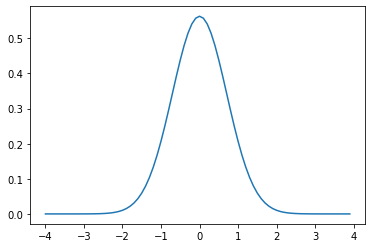

(0.9980015960720574, 7.996966669017945e-09)

In [2]:
coupled_probability = cef.coupled_probability(scipy_normal.pdf, 
                                              scipy_normal.rvs, 
                                              kappa=1., 
                                              alpha=2., 
                                              dim=1, 
                                              n=10000)
x = np.arange(-4, 4, 0.1)
density = coupled_probability(x)
plt.plot(x, density)
plt.show()
nquad(coupled_probability, support_inf)

In [3]:
print(cef.coupled_entropy(scipy_normal.pdf,
                    scipy_normal.rvs,
                    kappa=0.01,
                    alpha=2,
                    dim=1,
                    root=False,
                    n=10000))
print(cef.coupled_entropy(scipy_normal.pdf,
                    scipy_normal.rvs,
                    kappa=0.01,
                    alpha=2,
                    dim=1,
                    root=True,
                    n=10000))


1.4186016980982623
1.6461608950412778


In [4]:
print(cef.tsallis_entropy(scipy_normal.pdf,
                    scipy_normal.rvs,
                    kappa=0.01,
                    alpha=2, 
                    dim=1, 
                    normalize=False, 
                    root=False,
                    n=10000))
print(cef.tsallis_entropy(scipy_normal.pdf,
                    scipy_normal.rvs,
                    kappa=0.01,
                    alpha=2, 
                    dim=1, 
                    normalize=False, 
                    root=True,
                    n=10000))
print(cef.tsallis_entropy(scipy_normal.pdf,
                    scipy_normal.rvs,
                    kappa=0.01,
                    alpha=2, 
                    dim=1, 
                    normalize=True, 
                    root=False,
                    n=10000))
print(cef.tsallis_entropy(scipy_normal.pdf,
                    scipy_normal.rvs,
                    kappa=0.01,
                    alpha=2, 
                    dim=1, 
                    normalize=True, 
                    root=True,
                    n=10000))

1.3863436724229041
1.6087283299391781
1.4256770621798422
1.654371224751788


In [5]:
print(cef.shannon_entropy(scipy_normal.pdf,
                    scipy_normal.rvs,
                    dim=1, 
                    root=True,
                    n=10000))

1.6464647931513405


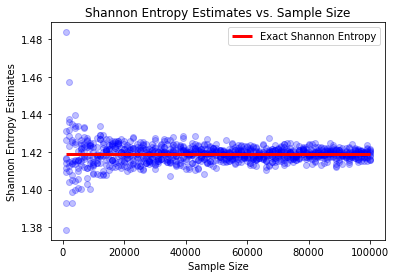

In [6]:
exact_normal_entropy = scipy_normal.entropy()

num_sims_per_sample_size = 10

min_n, max_n, num = 1000, 100000, 100
sample_sizes = np.linspace(min_n, max_n, num)

# Create vector of all integers from 0 to 1000 inclusive to be candidates for random seeds.
potential_seeds = np.arange(0, 100000, 1)

for i in range(num_sims_per_sample_size):
    
    shannon_entropy_estimates = []
    
    for n in sample_sizes:
        
        # Choose a seed from the potential seeds to be the random seeds for the round.
        seed = np.random.choice(potential_seeds, size=1)
        
        shannon_entropy_estimate = cef.shannon_entropy(scipy_normal.pdf,
                                                       scipy_normal.rvs,
                                                       dim=1, 
                                                       root=False,
                                                       n=int(n),
                                                       seed=seed)
        
        shannon_entropy_estimates.append(shannon_entropy_estimate)

    plt.scatter(sample_sizes, shannon_entropy_estimates, color="blue", alpha=0.25)

# Add a label a horizontal line for the approximate integral ratio.
plt.hlines(exact_normal_entropy, min_n, max_n, 
           colors="red", 
           label='Exact Shannon Entropy',
           linewidth=3)
plt.legend(loc="upper right")
plt.xlabel("Sample Size")
plt.ylabel("Shannon Entropy Estimates")
plt.title("Shannon Entropy Estimates vs. Sample Size")
plt.show()

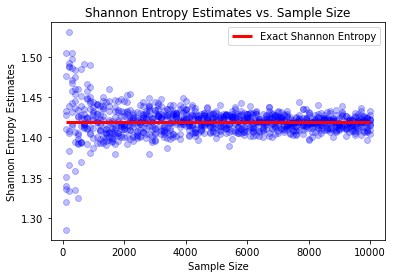

In [7]:
num_sims_per_sample_size = 10

min_n, max_n, num = 100, 10000, 100
sample_sizes = np.linspace(min_n, max_n, num)

# Create vector of all integers from 0 to 1000 inclusive to be candidates for random seeds.
potential_seeds = np.arange(0, 100000, 1)

# Run the simulations for each sample size n_sims_per_sample_size times.
for i in range(num_sims_per_sample_size):
    
    shannon_entropy_estimates = []
    
    for n in sample_sizes:
        
        # Choose a seed from the potential seeds to be the random seeds for the round.
        seed = np.random.choice(potential_seeds, size=1)
        
        shannon_entropy_estimate = cef.shannon_entropy(scipy_normal.pdf,
                                                       scipy_normal.rvs,
                                                       dim=1, 
                                                       root=False,
                                                       n=int(n),
                                                       seed=seed)
        
        shannon_entropy_estimates.append(shannon_entropy_estimate)
        
    plt.scatter(sample_sizes, shannon_entropy_estimates, color="blue", alpha=0.25)

# Add a label a horizontal line for the approximate integral ratio.
plt.hlines(exact_normal_entropy, min_n, max_n, 
           colors="red", 
           label='Exact Shannon Entropy',
           linewidth=3)
plt.legend(loc="upper right")
plt.xlabel("Sample Size")
plt.ylabel("Shannon Entropy Estimates")
plt.title("Shannon Entropy Estimates vs. Sample Size")
plt.show()

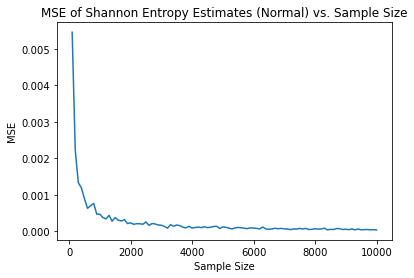

In [8]:
num_sims_per_sample_size = 50

min_n, max_n, num = 100, 10000, 100
sample_sizes = np.linspace(min_n, max_n, num)

# Create vector of all integers from 0 to 1000 inclusive to be candidates for random seeds.
potential_seeds = np.arange(0, 100000, 1)


mean_squared_errors = []
for n in sample_sizes:

    
    squared_errors = []

    for i in range(num_sims_per_sample_size):
        
        # Choose a seed from the potential seeds to be the random seeds for the round.
        seed = np.random.choice(potential_seeds, size=1)
        
        shannon_entropy_estimate = cef.shannon_entropy(scipy_normal.pdf,
                                                       scipy_normal.rvs,
                                                       dim=1, 
                                                       root=False,
                                                       n=int(n),
                                                       seed=seed)
        
        squared_error = (exact_normal_entropy - shannon_entropy_estimate)**2
        squared_errors.append(squared_error)
        
        
    
    # Add the mean ratio to the list of mean ratios.
    mean_squared_errors.append(np.mean(squared_errors))

plt.plot(sample_sizes, mean_squared_errors)
plt.xlabel("Sample Size")
plt.ylabel("MSE")
plt.title("MSE of Shannon Entropy Estimates (Normal) vs. Sample Size")
plt.show()

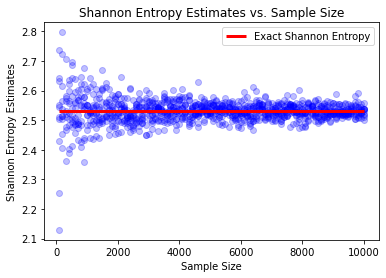

In [9]:
exact_cauchy_entropy = scipy_cauchy.entropy()

num_sims_per_sample_size = 10

min_n, max_n, num = 100, 10000, 100
sample_sizes = np.linspace(min_n, max_n, num)

# Create vector of all integers from 0 to 1000 inclusive to be candidates for random seeds.
potential_seeds = np.arange(0, 100000, 1)

# Run the simulations for each sample size n_sims_per_sample_size times.
for i in range(num_sims_per_sample_size):
    
    shannon_entropy_estimates = []
    
    for n in sample_sizes:
        
        # Choose a seed from the potential seeds to be the random seeds for the round.
        seed = np.random.choice(potential_seeds, size=1)
        
        shannon_entropy_estimate = cef.shannon_entropy(scipy_cauchy.pdf,
                                                       scipy_cauchy.rvs,
                                                       dim=1, 
                                                       root=False,
                                                       n=int(n),
                                                       seed=seed)
        
        shannon_entropy_estimates.append(shannon_entropy_estimate)
        
    plt.scatter(sample_sizes, shannon_entropy_estimates, color="blue", alpha=0.25)

# Add a label a horizontal line for the approximate integral ratio.
plt.hlines(exact_cauchy_entropy, min_n, max_n, 
           colors="red", 
           label='Exact Shannon Entropy',
           linewidth=3)
plt.legend(loc="upper right")
plt.xlabel("Sample Size")
plt.ylabel("Shannon Entropy Estimates")
plt.title("Shannon Entropy Estimates vs. Sample Size")
plt.show()

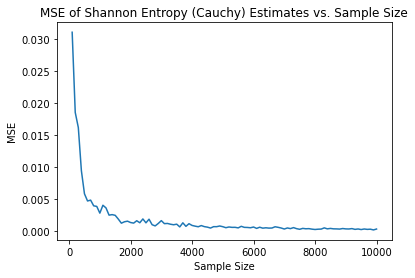

In [10]:
num_sims_per_sample_size = 50

min_n, max_n, num = 100, 10000, 100
sample_sizes = np.linspace(min_n, max_n, num)

# Create vector of all integers from 0 to 1000 inclusive to be candidates for random seeds.
potential_seeds = np.arange(0, 100000, 1)

mean_squared_errors = []
for n in sample_sizes:

    
    squared_errors = []

    for i in range(num_sims_per_sample_size):
        
        # Choose a seed from the potential seeds to be the random seeds for the round.
        seed = np.random.choice(potential_seeds, size=1)
        
        shannon_entropy_estimate = cef.shannon_entropy(scipy_cauchy.pdf,
                                                       scipy_cauchy.rvs,
                                                       dim=1, 
                                                       root=False,
                                                       n=int(n),
                                                       seed=seed)
        
        squared_error = (exact_cauchy_entropy - shannon_entropy_estimate)**2
        squared_errors.append(squared_error)
        
        
    
    # Add the mean ratio to the list of mean ratios.
    mean_squared_errors.append(np.mean(squared_errors))

plt.plot(sample_sizes, mean_squared_errors)
plt.xlabel("Sample Size")
plt.ylabel("MSE")
plt.title("MSE of Shannon Entropy (Cauchy) Estimates vs. Sample Size")
plt.show()

In [11]:
print(cef.coupled_cross_entropy(scipy_normal.pdf, 
                          scipy_cauchy.pdf, 
                          scipy_normal.rvs,
                          kappa=0.0, 
                          alpha=1.0, 
                          dim=1,
                          root=False,
                          n=10000,
                          seed=1))
print(cef.coupled_cross_entropy(scipy_normal.pdf, 
                          scipy_cauchy.pdf, 
                          scipy_normal.rvs,
                          kappa=0.0, 
                          alpha=1.0, 
                          dim=1,
                          root=True,
                          n=10000,
                          seed=1))

1.6757943980068704
1.6757943980068704


In [12]:
print(cef.coupled_divergence(scipy_normal.pdf, 
                             scipy_normal.pdf, 
                             scipy_normal.rvs,
                             kappa=0.0, 
                             alpha=1.0, 
                             dim=1, 
                             root=False,
                             n=10000,
                             seed=1))
print(cef.coupled_divergence(scipy_normal.pdf, 
                             scipy_cauchy.pdf, 
                             scipy_normal.rvs,
                             kappa=0.0, 
                             alpha=1.0, 
                             dim=1, 
                             root=False,
                             n=10000,
                             seed=1))

0.0
0.25802153161689523


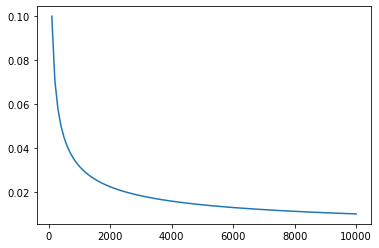

In [47]:
plt.plot(sample_sizes, sample_sizes**(-0.5))
plt.show()

## II. Checking the PDFs integrate to 1

In [13]:
from datetime import datetime

def nsc_normal_pdf(*args):
    x = np.array(args)
    return nsc_normal.prob(x)

def nsc_cauchy_pdf(*args):
    x = np.array(args)
    return nsc_cauchy.prob(x)

def nsc_2Dn_pdf(*args):
    x = np.array([args])
    return nsc_2Dn.prob(x, beta_func=True)

def nsc_3Dn_pdf(*args):
    x = np.array([args])
    return nsc_3Dn.prob(x, beta_func=True)

epsabs=1e-3

start_time = datetime.now()
nsc_normal_integration = nquad(nsc_normal_pdf, 
                               support_inf,
                               opts={'epsabs': epsabs})[0]
print(datetime.now() - start_time)

start_time = datetime.now()
nsc_cauchy_integration = nquad(nsc_cauchy_pdf, 
                              support_inf)[0]
print(datetime.now() - start_time)

start_time = datetime.now()
nsc_2Dn_integration = nquad(nsc_2Dn_pdf, 
                            support_inf_2D,
                            opts={'epsabs': epsabs})[0]
print(datetime.now() - start_time)

start_time = datetime.now()
nsc_3Dn_integration = nquad(nsc_3Dn_pdf, 
                            support_inf_3D,
                            opts={'epsabs': epsabs})[0]
print(datetime.now() - start_time)

print(f"Numerical integral over full support of the nsc normal: {nsc_normal_integration} \n")
print(f"Numerical integral over full support of the nsc cauchy: {nsc_cauchy_integration} \n")
print(f"Numerical integral over full support of the nsc bivariate normal: {nsc_2Dn_integration} \n")
print(f"Numerical integral over full support of the nsc trivariate normal: {nsc_3Dn_integration}")

0:00:00.004860
0:00:00.004313
0:00:02.708164


KeyboardInterrupt: 

## III. Checking the K-L Divergences from SciPy Distrtibutions

In [5]:
start_time = datetime.now()
normal_kl_divergence = cef.coupled_divergence(nsc_normal.prob,
                                              scipy_normal.pdf,
                                              kappa=0,
                                              alpha=2,
                                              dim=1,
                                              support=support_normal)
print(datetime.now() - start_time)

start_time = datetime.now()
cauchy_kl_divergence = cef.coupled_divergence(nsc_cauchy.prob,
                                              scipy_cauchy.pdf,
                                              kappa=0,
                                              alpha=2,
                                              dim=1,
                                              support=support_inf)
print(datetime.now() - start_time)

def nsc_mvn_pdf(x):
    x = np.array([x])
    return nsc_mvn.prob(x)

start_time = datetime.now()
mvn_kl_divergence = cef.coupled_divergence(nsc_mvn_pdf,
                                           scipy_mvn.pdf,
                                           kappa=0,
                                           alpha=2,
                                           dim=2,
                                           support=support_scipy_mvn)
print(datetime.now() - start_time)

print(f"K-L Divergence of nsc normal vs scipy normal: {normal_kl_divergence} \n")
print(f"K-L Divergence of nsc cauchy vs scipy cauchy: {cauchy_kl_divergence} \n")
print(f"K-L Divergence of nsc bivariate normal vs scipy bivariate normal: {mvn_kl_divergence} \n")

0:00:00.163639
0:00:00.187914
0:00:50.646506
K-L Divergence of nsc normal vs scipy normal: 0.0 

K-L Divergence of nsc cauchy vs scipy cauchy: 1.3322676295501878e-15 

K-L Divergence of nsc bivariate normal vs scipy bivariate normal: 0.0 



## IV. Testing the *coupled_cross_entropy* functions

In [4]:
cef.coupled_cross_entropy(nsc_normal.prob, 
                          nsc_cauchy.prob, 
                          kappa=0, 
                          alpha=alpha, 
                          dim=1, 
                          support=support_inf,
                          root=True)

1.8122405410609836

In [5]:
cef.coupled_cross_entropy(nsc_normal.prob, 
                          nsc_cauchy.prob, 
                          kappa=0, 
                          alpha=alpha, 
                          dim=1, 
                          support=support_inf,
                          root=False)

1.6781830656935353

## V. Testing the *coupled_entropy* and *shannon_entropy* functions

In [6]:
cef.coupled_entropy(nsc_normal.prob, 
                    kappa=0, 
                    alpha=alpha, 
                    dim=1, 
                    support=support_inf,
                    root=False)

C:\Users\jkcle\Documents\GitHub\Nonlinear-Statistical-Coupling\workspace\john\coupled_entropy_functions.py:60: RuntimeWarning: divide by zero encountered in power
  return density_func_q(x)**(-alpha)
C:\Users\jkcle\Documents\GitHub\Nonlinear-Statistical-Coupling\workspace\john\coupled_entropy_functions.py:66: RuntimeWarning: invalid value encountered in multiply
  return (my_coupled_probability(x)
C:\Users\jkcle\anaconda3\lib\site-packages\scipy\integrate\quadpack.py:880: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


nan

In [7]:
cef.coupled_entropy(nsc_normal.prob, 
                    kappa=0, 
                    alpha=alpha, 
                    dim=1, 
                    support=support_normal,
                    root=False)

1.4189385332046731

In [8]:
cef.coupled_entropy(nsc_normal.prob, 
                    kappa=0, 
                    alpha=alpha, 
                    dim=1, 
                    support=support_normal,
                    root=True)

1.6474397726303

In [9]:
cef.coupled_entropy(nsc_cauchy.prob, 
                    kappa=0, 
                    alpha=alpha, 
                    dim=1, 
                    support=support_normal,
                    root=False)

2.352125624049986

In [10]:
cef.coupled_entropy(nsc_cauchy.prob, 
                    kappa=0, 
                    alpha=alpha, 
                    dim=1, 
                    support=support_normal,
                    root=True)

2.090475807118503

In [11]:
numerical_approx_normal_entropy = cef.shannon_entropy(nsc_normal.prob, dim=1, support=support_normal)
normal_entropy = 0.5 * np.log(2 * np.pi * np.exp(1) * scale**2)

print(f"Numerical Approximation to Cauchy {loc, scale} Entropy: {numerical_approx_normal_entropy}")
print(f"Exact Normal {loc, scale} Entropy: {normal_entropy}")

Numerical Approximation to Cauchy (0.0, 1.0) Entropy: 1.4189385332046731
Exact Normal (0.0, 1.0) Entropy: 1.4189385332046727


In [12]:
numerical_approx_cauchy_entropy = cef.shannon_entropy(nsc_cauchy.prob, dim=1, support=support_inf)
cauchy_entropy = np.log(4*np.pi*scale)

print(f"Numerical Approximation to Cauchy {loc, scale} Entropy: {numerical_approx_cauchy_entropy}")
print(f"Exact Cauchy {loc, scale} Entropy: {cauchy_entropy}")

Numerical Approximation to Cauchy (0.0, 1.0) Entropy: 2.5310242469692894
Exact Cauchy (0.0, 1.0) Entropy: 2.5310242469692907


In [13]:
from scipy.stats import multivariate_normal

exact_mvn_entropy = 0.5 * np.log(np.linalg.det(2 * np.pi * np.exp(1) * np.array([[scale, 0],
                                                                                 [0, scale]])))
numerical_approx_mvn_entropy = cef.shannon_entropy(scipy_mvn.pdf, 
                                                   dim=2, 
                                                   support=support_scipy_mvn, 
                                                   root=False)

print(f"Numerical Approximation to MVN Entropy: {numerical_approx_mvn_entropy}")
print(f"Exact MVN Entropy: {exact_mvn_entropy}")

Numerical Approximation to MVN Entropy: 2.837877066409345
Exact MVN Entropy: 2.8378770664093453


## VI. Testing the *coupled_divergence* function

In [14]:
cef.coupled_divergence(nsc_normal.prob, 
                       nsc_normal.prob, 
                       kappa=0, 
                       alpha=alpha, 
                       dim=1, 
                       support=support_normal,
                       root=False)

0.0

In [15]:
cef.coupled_divergence(nsc_cauchy.prob, 
                       nsc_cauchy.prob, 
                       kappa=0, 
                       alpha=alpha, 
                       dim=1, 
                       support=support_inf,
                       root=False)

0.0

In [16]:
cef.coupled_divergence(nsc_normal.prob, 
                       nsc_cauchy.prob, 
                       kappa=0, 
                       alpha=alpha, 
                       dim=1, 
                       support=support_inf,
                       root=False)

nan

# Plotting the *coupled_entropy* function

from tqdm import tqdm
# plt.figure(figsize=(12, 8))
Y = {}
plot_coupledEntropy = []
plot_coupledEntropy_root = []
plot_tsallisEntropyNormalized = []
plot_tsallisEntropy = []
plot_tsallisEntropyRootNormalized = []
plot_tsallisEntropyRoot = []
plot_shannonEntropy = []
plot_shannonEntropy_root = []

kappa_values = [round(value, 1) for value in np.linspace(0, 4, 41)]
n = len(kappa_values)

mu, cov = [0, 0], np.array([[1, 0],
                            [0, 1]])

dim = len(mu)
alpha = 2

for i in tqdm(range(len(kappa_values))):
    kappa = kappa_values[i]
    temp_normal = multivariate_normal(mean=mu, cov=cov)
    y = temp_normal.pdf
    Y[kappa] = cpqi.coupled_entropy(y, kappa=kappa, alpha=alpha, dim=dim, support=support, root=False)
    plot_coupledEntropy.append(Y[kappa])
    Y[kappa] = cpqi.coupled_entropy(y, kappa=kappa, alpha=alpha, dim=dim, support=support, root=True)
    plot_coupledEntropy_root.append(Y[kappa])
    Y[kappa] = cpqi.tsallis_entropy(y, kappa=kappa, alpha=alpha, dim=dim, support=support, normalize=True, root=False)
    plot_tsallisEntropyNormalized.append(Y[kappa])
    Y[kappa] = cpqi.tsallis_entropy(y, kappa=kappa, alpha=alpha, dim=dim, support=support, normalize=False, root=False)
    plot_tsallisEntropy.append(Y[kappa])
    Y[kappa] = cpqi.tsallis_entropy(y, kappa=kappa, alpha=alpha, dim=dim, support=support, normalize=True, root=True)
    plot_tsallisEntropyRootNormalized.append(Y[kappa])
    Y[kappa] = cpqi.tsallis_entropy(y, kappa=kappa, alpha=alpha, dim=dim, support=support, normalize=False, root=True)
    plot_tsallisEntropyRoot.append(Y[kappa])
    Y[kappa] = cpqi.shannon_entropy(y, dim=dim, support=support, root=False)
    plot_shannonEntropy.append(Y[kappa])
    Y[kappa] = cpqi.shannon_entropy(y, dim=dim, support=support, root=True)
    plot_shannonEntropy_root.append(Y[kappa])

plot_coupledEntropy = np.array(plot_coupledEntropy)
plot_coupledEntropy_root = np.array(plot_coupledEntropy_root)
plot_tsallisEntropyNormalized = np.array(plot_tsallisEntropyNormalized)
plot_tsallisEntropy = np.array(plot_tsallisEntropy)
plot_tsallisEntropyRootNormalized = np.array(plot_tsallisEntropyRootNormalized)
plot_tsallisEntropyRoot = np.array(plot_tsallisEntropyRoot)
plot_shannonEntropy = np.array(plot_shannonEntropy)
plot_shannonEntropy_root = np.array(plot_shannonEntropy_root)

fig, ax = plt.subplots(figsize=(16, 10))
ax.axvline(c='black', lw=1)
ax.axhline(c='black', lw=1)

cm = plt.get_cmap('PiYG')
plt.xlim(0, 4)
plt.ylim(-1, 14)
plt.plot(kappa_values, plot_coupledEntropy, label='Coupled Entropy',
         color='blue')
plt.plot(kappa_values, plot_tsallisEntropyNormalized, label='Normalized Tsallis Entropy',
         color='green')
plt.plot(kappa_values, plot_tsallisEntropy, label='Tsallis Entropy',
         color='orange')
plt.plot(kappa_values, plot_shannonEntropy, label='Shannon Entropy',
         color='red')

plt.grid()
plt.title(f'Multivariate Gaussian {(mu), (cov)} with alpha = {alpha}', fontsize=20)
plt.xlabel('kappa values', fontsize=15)
plt.ylabel('Entropy/Entopy Root')
plt.legend()
plt.show();

fig, ax = plt.subplots(figsize=(16, 10))
ax.axvline(c='black', lw=1)
ax.axhline(c='black', lw=1)

cm = plt.get_cmap('PiYG')
plt.xlim(0, 4)
#plt.ylim(-1, 6)

plt.plot(kappa_values, plot_coupledEntropy_root, label='Coupled Entropy Root',
         color='blue')
plt.plot(kappa_values, plot_tsallisEntropyRootNormalized, label='Normalized Tsallis Entropy Root',
         color='green')
plt.plot(kappa_values, plot_tsallisEntropyRoot, label='Tsallis Entropy Root',
         color='orange')
plt.plot(kappa_values, plot_shannonEntropy_root, label='Shannon Entropy Root',
         color='red')
plt.grid()
plt.title(f'Multivariate Gaussian {mu, cov} with alpha = {alpha}', fontsize=20)
plt.xlabel('kappa values', fontsize=15)
plt.ylabel('Entropy/Entopy Root')
plt.legend()
plt.show();